# Self Subduction Case 1

In [1]:
import UWGeodynamics as GEO
from UWGeodynamics import visualisation as vis

loaded rc file /workspace/user_data/UWGeodynamics/UWGeodynamics/uwgeo-data/uwgeodynamicsrc


In [2]:
u = GEO.UnitRegistry

In [3]:
half_rate = 1.0 * u.centimeter / u.year
model_length = 3000. * u.kilometer
surfaceTemp = 273.15 * u.degK
baseModelTemp = 1603.15 * u.degK
bodyforce = 3300 * u.kilogram / u.metre**3 * 9.81 * u.meter / u.second**2

KL = model_length
Kt = KL / half_rate
KM = bodyforce * KL**2 * Kt**2
KT = (baseModelTemp - surfaceTemp)

GEO.scaling_coefficients["[length]"] = KL
GEO.scaling_coefficients["[time]"] = Kt
GEO.scaling_coefficients["[mass]"]= KM
GEO.scaling_coefficients["[temperature]"] = KT

In [4]:
Model = GEO.Model(elementRes=(256, 128), 
                  minCoord=(-1500. * u.kilometer, -700. * u.kilometer), 
                  maxCoord=(1500. * u.kilometer, 50. * u.kilometer), 
                  gravity=(0.0, -9.81 * u.meter / u.second**2))

In [5]:
polygon = GEO.shapes.Polygon([(-500. * u.kilometer, -0. * u.kilometer),
                              (-500. * u.kilometer, -200. * u.kilometer),
                              (-400. * u.kilometer, -200. * u.kilometer),
                              (-400. * u.kilometer, -100. * u.kilometer),
                              (1500. * u.kilometer, -100. * u.kilometer),
                              (1500. * u.kilometer, -0. * u.kilometer)])

In [6]:
stickyAir = Model.add_material(name="Mantle", shape=GEO.shapes.Layer(top=Model.top, bottom=0. * u.kilometer))
Mantle = Model.add_material(name="Mantle", shape=GEO.shapes.Layer(top=0.*u.kilometer, bottom=Model.bottom))
Lithosphere = Model.add_material(name="Lithosphere", shape=polygon)


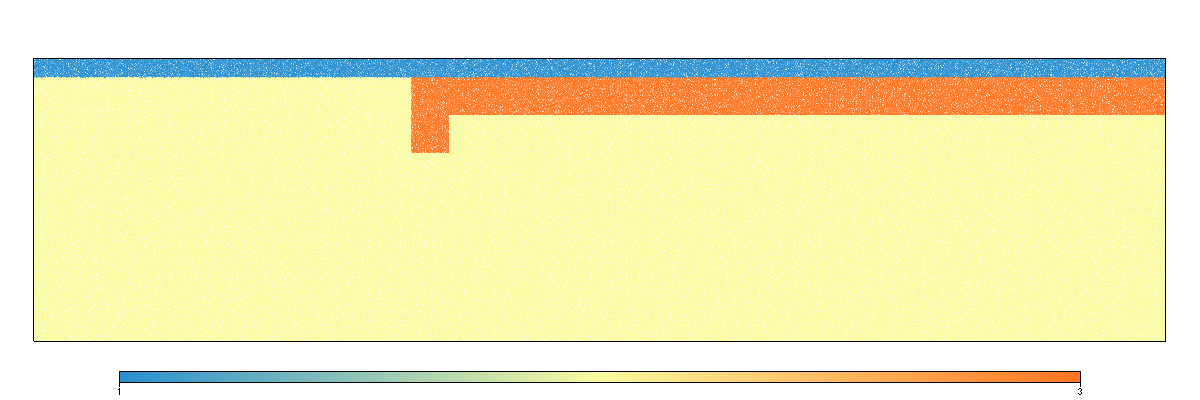

In [7]:
Fig = vis.Figure(figsize=(1200,400))
Fig.Points(Model.swarm, Model.materialField)
Fig.show()

In [8]:
tip_tracer1 = Model.add_passive_tracers(name="tip tracer 1", vertices=[GEO.nd(-500. * u.kilometer), GEO.nd(-200. * u.kilometer)])
tip_tracer2 = Model.add_passive_tracers(name="tip tracer 2", vertices=[GEO.nd(-450. * u.kilometer), GEO.nd(-200. * u.kilometer)])
tip_tracer3 = Model.add_passive_tracers(name="tip tracer 3", vertices=[GEO.nd(-400. * u.kilometer), GEO.nd(-200. * u.kilometer)])


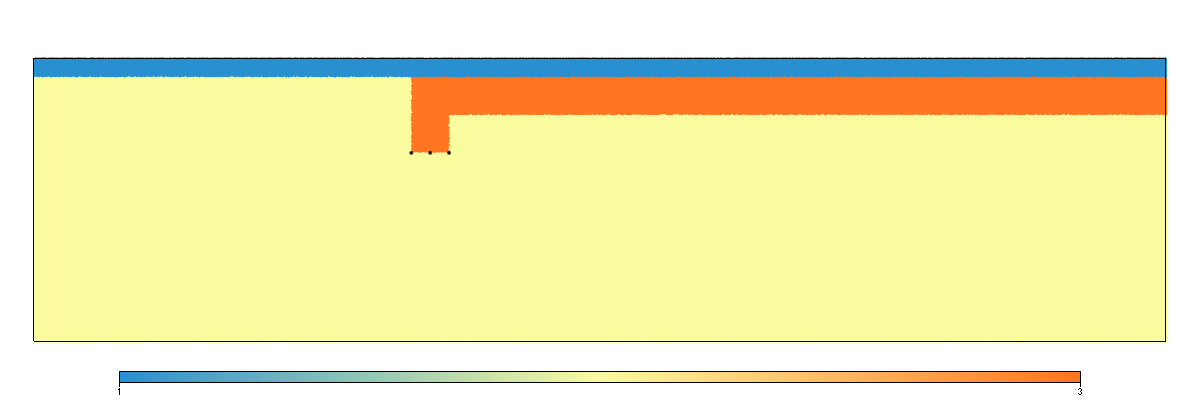

In [9]:
Fig = vis.Figure(figsize=(1200,400))
Fig.Points(tip_tracer1.swarm, pointSize=5.0)
Fig.Points(tip_tracer2.swarm, pointSize=5.0)
Fig.Points(tip_tracer3.swarm, pointSize=5.0)
Fig.Points(Model.swarm, Model.materialField, fn_size=3.0)
Fig.show()

In [10]:
stickyAir.viscosity = 1e19 * u.pascal * u.second
Mantle.viscosity = 1e21 * u.pascal * u.second
Lithosphere.viscosity = 1e23 * u.pascal * u.second

In [11]:
stickyAir.density = 1. * u.kilogram / u.metre**3
Mantle.density = 3200. * u.kilogram / u.metre**3
Lithosphere.density = 3300. * u.kilogram / u.metre**3


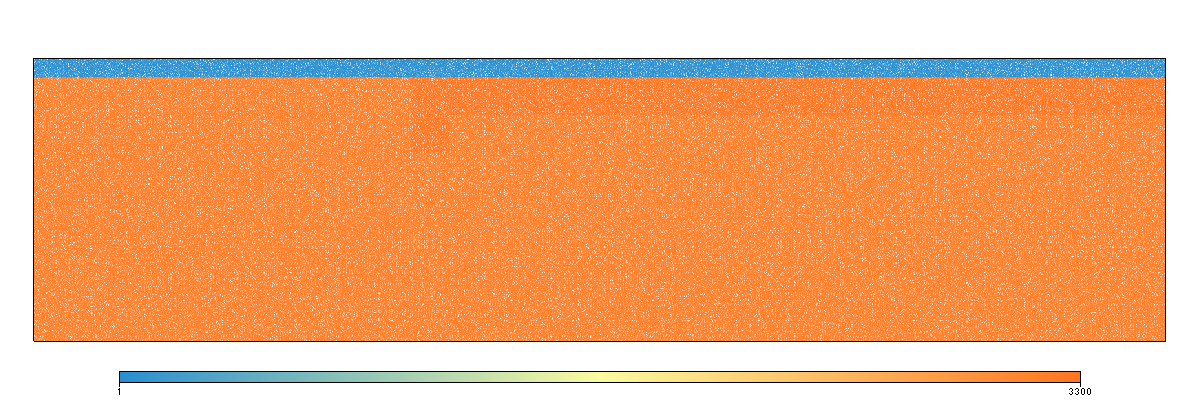

In [12]:
Fig = vis.Figure(figsize=(1200,400))
Fig.Points(Model.swarm, GEO.Dimensionalize(Model.densityField, u.kilogram / u.metre**3))
Fig.show()


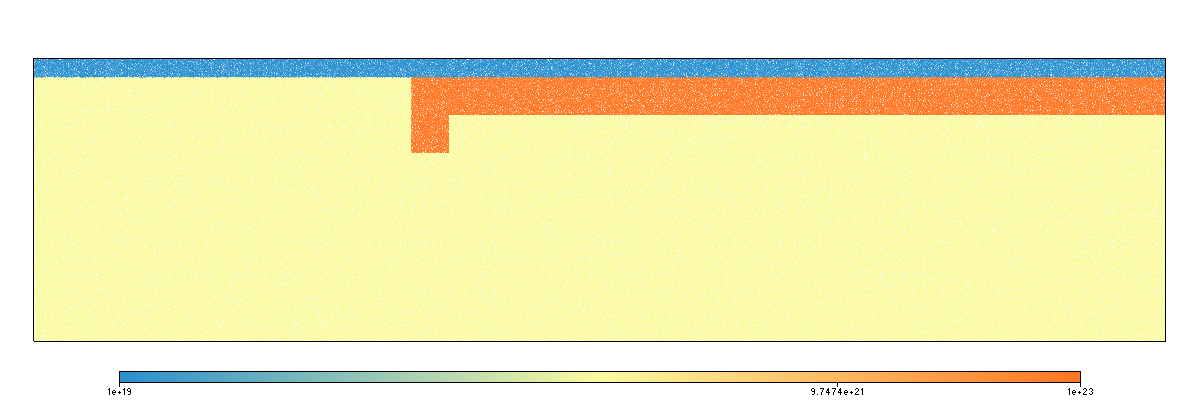

In [13]:
Fig = vis.Figure(figsize=(1200,400))
Fig.Points(Model.swarm, GEO.Dimensionalize(Model.viscosityField, u.pascal * u.second), logScale=True)
Fig.show()

In [14]:
Model.set_velocityBCs(left=[0., None],
                      right=[0., None],
                      bottom=[None, 0.],
                      top=[None, 0.])

In [15]:
Model.init_model()

In [16]:
GEO.rcParams["solver"] = "mumps"
GEO.rcParams["penalty"] = 1e6

In [17]:
!rm -rf outputs
Model.run_for(nstep=10)

Running with UWGeodynamics version 0.9.4-dev-1011449(development)
Step:1 Model Time:  4237.309658475039 year dt: 4237.309658475039 year (2018-11-12 07:26:14)
Step:2 Model Time:  10587.12097828261 year dt: 6349.81131980757 year (2018-11-12 07:26:20)
Step:3 Model Time:  18601.76448322555 year dt: 8014.64350494294 year (2018-11-12 07:26:25)
Step:4 Model Time:  27240.212963056805 year dt: 8638.448479831255 year (2018-11-12 07:26:31)
Step:5 Model Time:  36842.93186056783 year dt: 9602.718897511022 year (2018-11-12 07:26:37)
Step:6 Model Time:  48730.31657967743 year dt: 11887.384719109601 year (2018-11-12 07:26:42)
Step:7 Model Time:  61141.56734216987 year dt: 12411.250762492444 year (2018-11-12 07:26:48)
Step:8 Model Time:  75194.96446445142 year dt: 14053.397122281549 year (2018-11-12 07:26:53)
Step:9 Model Time:  91845.3572119134 year dt: 16650.392747461985 year (2018-11-12 07:26:59)
Step:10 Model Time:  111133.25371598166 year dt: 19287.896504068238 year (2018-11-12 07:27:04)


1


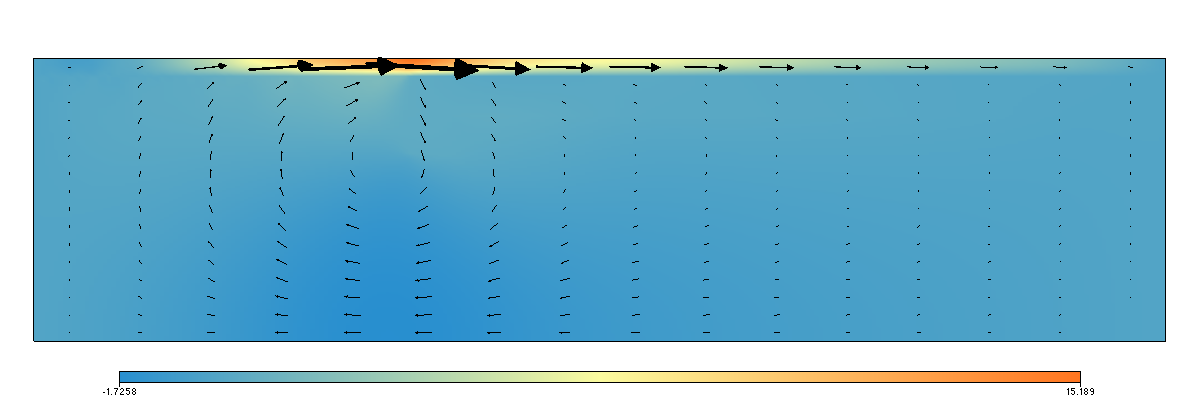

In [19]:
Fig = vis.Figure(figsize=(1200,400))
Fig.Surface(Model.mesh, Model.velocityField[0])
Fig.VectorArrows(Model.mesh, Model.velocityField)
Fig.show()